In [1]:
import pandas as pd

In [143]:
roi_df = pd.read_csv('final_roi_analysis_v2.csv')

In [94]:
df = pd.read_csv('df_final_sku_store_quarter_noextinfo.csv')

In [142]:
df = df[['STORE', 'SKU', 'COST']]

In [144]:
roi_df_merged = df.merge(roi_df, on = ['SKU', 'STORE'])

In [152]:
#filter for SKUs that has revenue in the previous quarter
roi_filtered = roi_df_merged[(roi_df_merged['base_line'].notnull()) & (roi_filtered['averagesellingprice'] != 0) ]

In [153]:
roi_filtered['totalcost_actual'] = roi_filtered['totalunitssold'] * roi_filtered['COST']
roi_filtered['totalcost_baseline'] = roi_filtered['base_line'] / roi_filtered['averagesellingprice'] * roi_filtered['COST'] 
roi_filtered['totalcost_model'] = roi_filtered['pred_revenue'] / roi_filtered['averagesellingprice'] * roi_filtered['COST'] 
roi_filtered_quarter.head()

/var/folders/0n/jt9yc0v96tg4w5vx0mvqft540000gn/T/ipykernel_70626/520522020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  roi_filtered['totalcost_actual'] = roi_filtered['totalunitssold'] * roi_filtered['COST']
/var/folders/0n/jt9yc0v96tg4w5vx0mvqft540000gn/T/ipykernel_70626/520522020.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  roi_filtered['totalcost_baseline'] = roi_filtered['base_line'] / roi_filtered['averagesellingprice'] * roi_filtered['COST']
/var/folders/0n/jt9yc0v96tg4w5vx0mvqft540000g

,STORE,SKU,COST,index,year,quarter,revenue,pred_log_revenue,pred_revenue,base_line,totalunitssold,averageoriginalprice,averagesellingprice,totalcost_actual,totalcost_baseline,totalcost_model
50,102,8224,10.14,31,2005,Q3,32.00,3.787999,43.167928,32.0,2,32.0,16.00,20.28,20.280000,27.357674
52,102,8224,10.14,31,2005,Q3,32.00,3.787999,43.167928,32.0,2,32.0,16.00,20.28,20.280000,27.357674
59,102,9019,12.50,38,2005,Q3,16.98,3.836950,45.383802,102.0,2,34.0,8.49,25.00,150.176682,66.819498
61,102,9019,12.50,38,2005,Q3,16.98,3.836950,45.383802,102.0,2,34.0,8.49,25.00,150.176682,66.819498
67,102,9633,13.50,44,2005,Q3,157.50,5.080640,159.876958,189.0,7,22.5,22.50,94.50,113.400000,95.926175


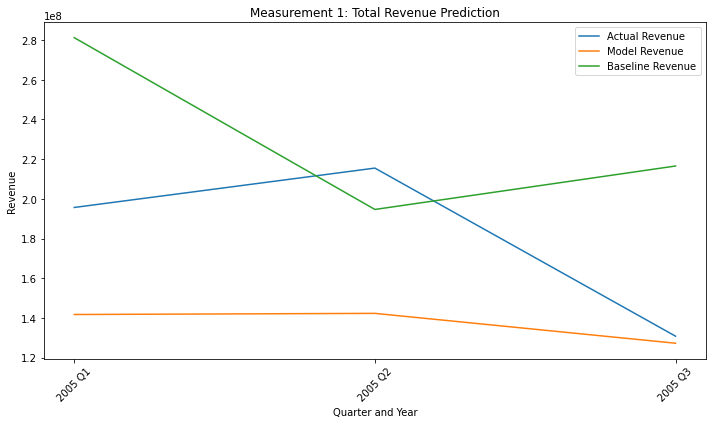

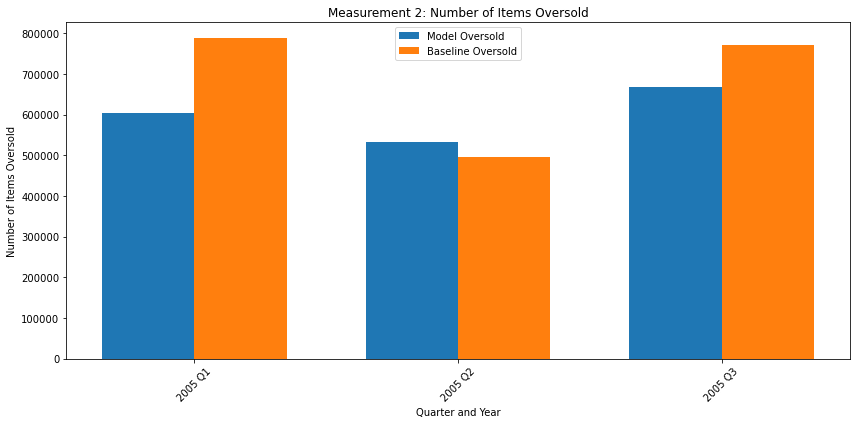

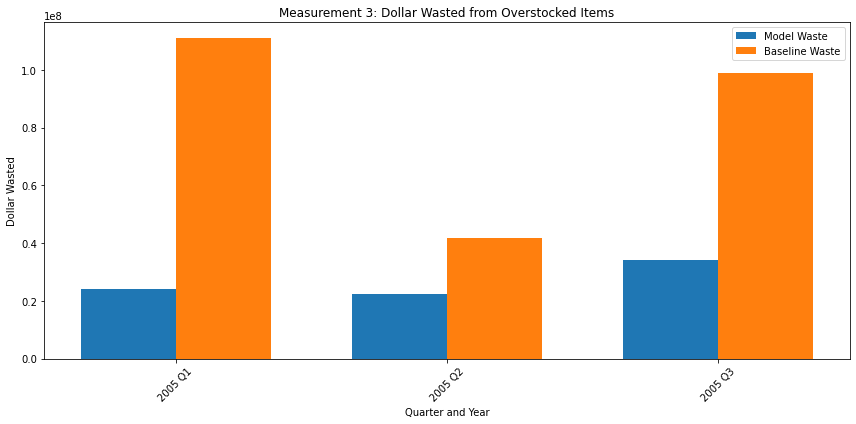

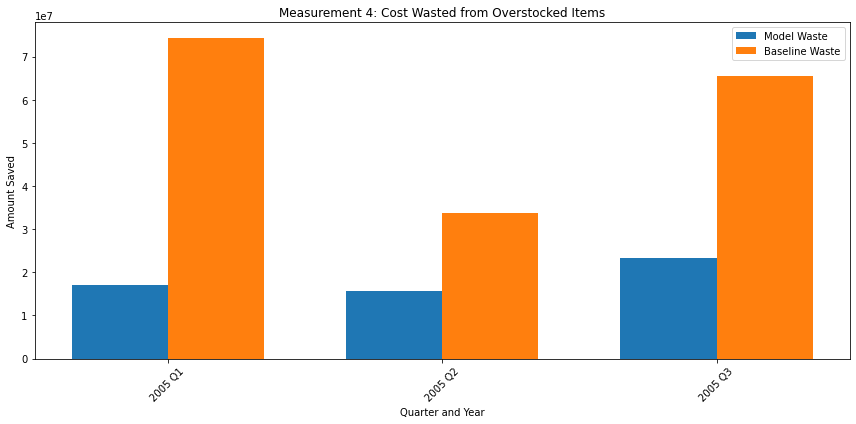

In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
roi_df = pd.read_csv('final_roi_analysis.csv')

# Define the list of quarters and years you want to analyze
quarters_years = [
    (2005, 'Q1'),
    (2005, 'Q2'),
    (2005, 'Q3')
]

# Initialize lists to store results for each measurement
num_items_oversold_pred = []
dollar_savings_pred = []
num_items_oversold_baseline = []
dollar_savings_baseline = []
actual_revenues=[]
predicted_revenues=[]
baseline_revenues = []
cost_savings_baseline = []
cost_savings_pred = []

# Iterate through each quarter and year
for year, quarter in quarters_years:
    roi_filtered_quarter = roi_filtered[(roi_filtered.year == year) & (roi_filtered.quarter == quarter)]
    
    
     # Measurement 1: Total Revenue Prediction
    actual = roi_filtered_quarter.revenue.sum()
    predict = roi_filtered_quarter.pred_revenue.sum()
    baseline = roi_filtered_quarter.base_line.sum()
    
    actual_revenues.append(actual)
    predicted_revenues.append(predict)
    baseline_revenues.append(baseline)
    
    
    # Measurement 2: Number of Items Oversold
    filtered_df_pred = roi_filtered_quarter[roi_filtered_quarter['pred_revenue'] > roi_filtered_quarter['revenue']]
    num_items_pred = len(filtered_df_pred)
    num_items_oversold_pred.append(num_items_pred)
    
    filtered_df_baseline = roi_filtered_quarter[roi_filtered_quarter['base_line'] > roi_filtered_quarter['revenue']]
    num_items_baseline = len(filtered_df_baseline)
    num_items_oversold_baseline.append(num_items_baseline)
    
    # Measurement 3: Dollar Savings from Overstocked Items
    dollar_saving_pred = (filtered_df_pred['pred_revenue'] - filtered_df_pred['revenue']).sum()
    dollar_savings_pred.append(dollar_saving_pred)
    
    dollar_saving_baseline = (filtered_df_baseline['base_line'] - filtered_df_baseline['revenue']).sum()
    dollar_savings_baseline.append(dollar_saving_baseline)
    
    
    # Measurement 4: Cost Savings from Overstocked Items
    cost_saving_pred = (filtered_df_pred['totalcost_model'] - filtered_df_pred['totalcost_actual']).sum()
    cost_savings_pred.append(cost_saving_pred)
    
    cost_saving_baseline = (filtered_df_baseline['totalcost_baseline'] - filtered_df_baseline['totalcost_actual']).sum()
    cost_savings_baseline.append(cost_saving_baseline)


    
# Measurement 1: Total Revenue Prediction
plt.figure(figsize=(10, 6))
plt.plot([f'{year} {quarter}' for year, quarter in quarters_years], actual_revenues, label='Actual Revenue')
plt.plot([f'{year} {quarter}' for year, quarter in quarters_years], predicted_revenues, label='Model Revenue')
plt.plot([f'{year} {quarter}' for year, quarter in quarters_years], baseline_revenues, label='Baseline Revenue')
plt.title('Measurement 1: Total Revenue Prediction')
plt.xlabel('Quarter and Year')
plt.ylabel('Revenue')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Create grouped bar charts for Measurement 2: Number of Items Oversold
bar_width = 0.35
index = np.arange(len(quarters_years))
plt.figure(figsize=(12, 6))
plt.bar(index - bar_width/2, num_items_oversold_pred, bar_width, label='Model Oversold')
plt.bar(index + bar_width/2, num_items_oversold_baseline, bar_width, label='Baseline Oversold')
plt.xlabel('Quarter and Year')
plt.ylabel('Number of Items Oversold')
plt.title('Measurement 2: Number of Items Oversold')
plt.xticks(index, [f'{year} {quarter}' for year, quarter in quarters_years], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Create grouped bar charts for Measurement 3: Dollar Savings from Overstocked Items
plt.figure(figsize=(12, 6))
plt.bar(index - bar_width/2, dollar_savings_pred, bar_width, label='Model Waste')
plt.bar(index + bar_width/2, dollar_savings_baseline, bar_width, label='Baseline Waste')
plt.xlabel('Quarter and Year')
plt.ylabel('Dollar Wasted')
plt.title('Measurement 3: Dollar Wasted from Overstocked Items')
plt.xticks(index, [f'{year} {quarter}' for year, quarter in quarters_years], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



# Create grouped bar charts for Measurement 4: Cost Savings from Overstocked Items
plt.figure(figsize=(12, 6))
plt.bar(index - bar_width/2, cost_savings_pred, bar_width, label='Model Waste')
plt.bar(index + bar_width/2, cost_savings_baseline, bar_width, label='Baseline Waste')
plt.xlabel('Quarter and Year')
plt.ylabel('Amount Saved')
plt.title('Measurement 4: Cost Wasted from Overstocked Items')
plt.xticks(index, [f'{year} {quarter}' for year, quarter in quarters_years], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [158]:
dollar_savings_pred

[24200662.62739277, 22195389.20390925, 34247515.51827771]

In [159]:
dollar_savings_baseline

[110886172.91126722, 41809550.23943114, 98901758.65143567]

In [160]:
num_items_oversold_pred

[602821, 531513, 667511]

In [161]:
num_items_oversold_baseline

[787487, 495300, 771773]

In [163]:
cost_savings_pred

[16994058.814582378, 15722645.722436724, 23370498.246117447]

In [162]:
cost_savings_baseline

[74237161.4888357, 33674632.59464751, 65538834.16604572]